# Experiments on CNN
In this notebook, I'm performing and recording the experimentations on CNN for understanding how the models work and how underfitting and overfitting looks like on epoch vs loss curve for training and validation set during training.

In [24]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

In [25]:
import tensorflow as tf
tf.__version__

'2.11.0'

In [26]:
num_classes = 10
input_shape = (28, 28, 1)

# Load the data and split it between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


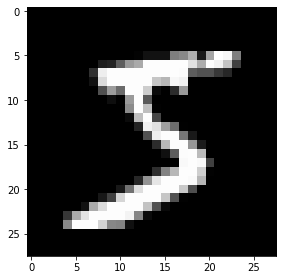

In [27]:
import skimage.io as io
io.imshow(x_train[0]) 

# 12, 3 filters

In [28]:
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(12, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(3, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 26, 26, 12)        120       
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 13, 13, 12)       0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 11, 11, 3)         327       
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 5, 5, 3)          0         
 g2D)                                                            
                                                                 
 flatten_5 (Flatten)         (None, 75)                0         
                                                                 
 dropout_5 (Dropout)         (None, 75)               

In [29]:
batch_size = 128
epochs = 100

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
mycallbacks = [keras.callbacks.EarlyStopping(monitor='loss', min_delta=1e-4, patience=3, verbose=1),
               keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', patience=3, verbose=1, restore_best_weights=True)
              ]
history = model.fit(x_train, y_train,
                    batch_size=batch_size, epochs=epochs,
                    validation_split=0.2,
                    callbacks=mycallbacks, verbose=0)

score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Epoch 33: early stopping
Test loss: 0.14023080468177795
Test accuracy: 0.9605000019073486


In [30]:
x_train.shape, y_train.shape

((60000, 28, 28, 1), (60000, 10))

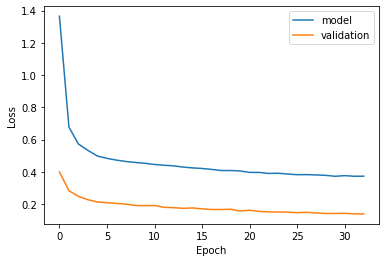

In [31]:
from matplotlib import pyplot as plt
plt.plot(history.history['loss'], label='model')
plt.plot(history.history['val_loss'], label='validation')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

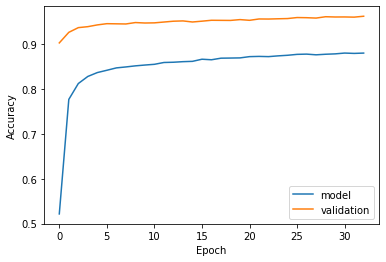

In [32]:
plt.plot(history.history['accuracy'], label='model')
plt.plot(history.history['val_accuracy'], label='validation')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# 64, 32 filters

In [33]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 13, 13, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 11, 11, 32)        18464     
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 5, 5, 32)         0         
 g2D)                                                            
                                                                 
 flatten_6 (Flatten)         (None, 800)               0         
                                                                 
 dropout_6 (Dropout)         (None, 800)              

In [34]:
batch_size = 128
epochs = 100

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
mycallbacks = [keras.callbacks.EarlyStopping(monitor='loss', min_delta=1e-4, patience=3, verbose=1),
               keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', patience=3, verbose=1, restore_best_weights=True)
              ]
history = model.fit(x_train, y_train,
                    batch_size=batch_size, epochs=epochs,
                    validation_split=0.2,
                    callbacks=mycallbacks, verbose=0)

score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Restoring model weights from the end of the best epoch: 12.
Epoch 15: early stopping
Test loss: 0.0295232143253088
Test accuracy: 0.9908000230789185


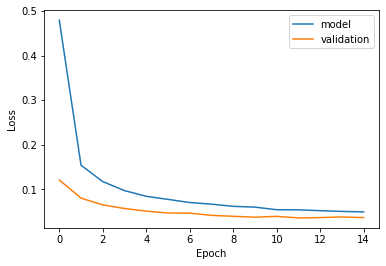

In [35]:
from matplotlib import pyplot as plt
plt.plot(history.history['loss'], label='model')
plt.plot(history.history['val_loss'], label='validation')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

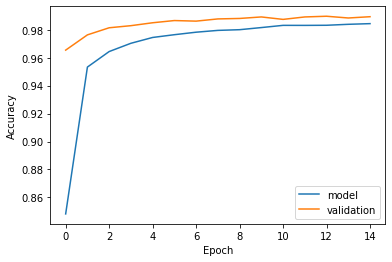

In [36]:
plt.plot(history.history['accuracy'], label='model')
plt.plot(history.history['val_accuracy'], label='validation')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# 128, 64

In [37]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(128, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_17 (Conv2D)          (None, 26, 26, 128)       1280      
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 13, 13, 128)      0         
 g2D)                                                            
                                                                 
 conv2d_18 (Conv2D)          (None, 11, 11, 64)        73792     
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 5, 5, 64)         0         
 g2D)                                                            
                                                                 
 flatten_7 (Flatten)         (None, 1600)              0         
                                                                 
 dropout_7 (Dropout)         (None, 1600)             

In [38]:
batch_size = 128
epochs = 100

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
mycallbacks = [keras.callbacks.EarlyStopping(monitor='loss', min_delta=1e-4, patience=3, verbose=1),
               keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', patience=3, verbose=1, restore_best_weights=True)
              ]
history = model.fit(x_train, y_train,
                    batch_size=batch_size, epochs=epochs,
                    validation_split=0.2,
                    callbacks=mycallbacks, verbose=0)

score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Restoring model weights from the end of the best epoch: 20.
Epoch 23: early stopping
Test loss: 0.025227582082152367
Test accuracy: 0.9923999905586243


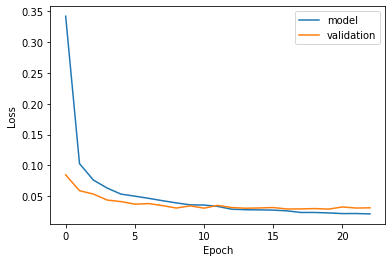

In [39]:
from matplotlib import pyplot as plt
plt.plot(history.history['loss'], label='model')
plt.plot(history.history['val_loss'], label='validation')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

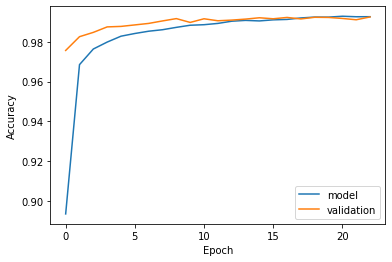

In [40]:
plt.plot(history.history['accuracy'], label='model')
plt.plot(history.history['val_accuracy'], label='validation')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# 128, 64, 32



In [41]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(128, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_19 (Conv2D)          (None, 26, 26, 128)       1280      
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 13, 13, 128)      0         
 g2D)                                                            
                                                                 
 conv2d_20 (Conv2D)          (None, 11, 11, 64)        73792     
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 5, 5, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_21 (Conv2D)          (None, 3, 3, 32)          18464     
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 1, 1, 32)        

In [42]:
batch_size = 128
epochs = 100

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
mycallbacks = [keras.callbacks.EarlyStopping(monitor='loss', min_delta=1e-4, patience=3, verbose=1),
               keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', patience=3, verbose=1, restore_best_weights=True)
              ]
history = model.fit(x_train, y_train,
                    batch_size=batch_size, epochs=epochs,
                    validation_split=0.2,
                    callbacks=mycallbacks, verbose=0)

score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Restoring model weights from the end of the best epoch: 12.
Epoch 15: early stopping
Test loss: 0.060245148837566376
Test accuracy: 0.9843999743461609


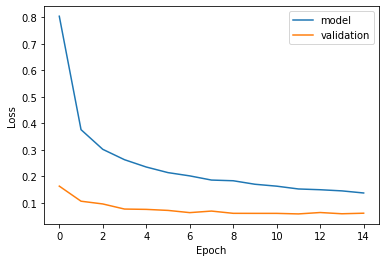

In [43]:
from matplotlib import pyplot as plt
plt.plot(history.history['loss'], label='model')
plt.plot(history.history['val_loss'], label='validation')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

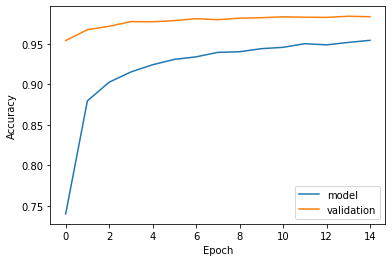

In [44]:
plt.plot(history.history['accuracy'], label='model')
plt.plot(history.history['val_accuracy'], label='validation')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# 20

In [58]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(20, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_26 (Conv2D)          (None, 26, 26, 20)        200       
                                                                 
 max_pooling2d_26 (MaxPoolin  (None, 13, 13, 20)       0         
 g2D)                                                            
                                                                 
 flatten_13 (Flatten)        (None, 3380)              0         
                                                                 
 dropout_12 (Dropout)        (None, 3380)              0         
                                                                 
 dense_11 (Dense)            (None, 10)                33810     
                                                                 
Total params: 34,010
Trainable params: 34,010
Non-trainable params: 0
_________________________________________________

In [59]:
batch_size = 128
epochs = 100

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
mycallbacks = [keras.callbacks.EarlyStopping(monitor='loss', min_delta=1e-4, patience=3, verbose=1),
               keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', patience=3, verbose=1, restore_best_weights=True)
              ]
history = model.fit(x_train, y_train,
                    batch_size=batch_size, epochs=epochs,
                    validation_split=0.2,
                    callbacks=mycallbacks, verbose=0)

score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Restoring model weights from the end of the best epoch: 29.
Epoch 32: early stopping
Test loss: 0.049312569200992584
Test accuracy: 0.9842000007629395


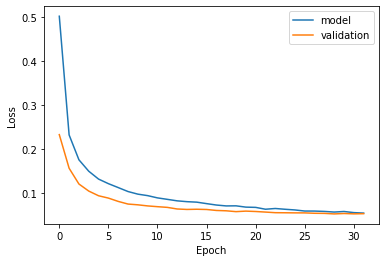

In [60]:
from matplotlib import pyplot as plt
plt.plot(history.history['loss'], label='model')
plt.plot(history.history['val_loss'], label='validation')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

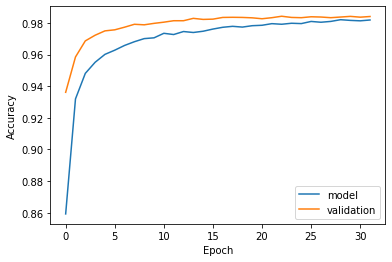

In [61]:
plt.plot(history.history['accuracy'], label='model')
plt.plot(history.history['val_accuracy'], label='validation')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# CNN
## Convolutional layer
- Consists of **kernels** that are used to return **feature maps** for a given input.
- **Detector stage** - This adds non-linearity. Detects the presence of a feature.
- **Max pooling** - Subsampling. Taking the maximum value within a window.
- Kernels or filters are learnt using backpropagation algorithm while training the network.

## Dropout
- Regularization to avoid overfitting by droping random nodes during training.

# Architechture tested
| Architecture(Number of filters in convolutional layers)| Number of Epochs| Test accuracy|
|:---:|:---:|:---:|
|12, 3| 36| 0.96|
|64, 32|25| 0.99|
|128, 64| 18|0.99|
|128, 64, 32| 18|0.98|
| 20| |


# Observations
- Increasing the number of filters in the convolution layer leads to better approximation of the features, which inturn gives better results through out the network.
- A simple FCNN consisting of only one layer is enough to classify the data set for a good enough convolution layer.

# Experiment with Fitting of the model
- Training set = 60000 images (using 20% of this for validation)
- Testing set = 10000 images


## An underfit model
A very simple model

In [90]:
model = model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        # layers.Conv2D(10, kernel_size=(3, 3), activation="relu"),
        # layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        # layers.Dropout(0.5),
        layers.Dense(num_classes, activation="sigmoid"),
    ]
)
model.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_21 (Flatten)        (None, 784)               0         
                                                                 
 dense_19 (Dense)            (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [91]:
batch_size = 128
epochs = 20

model.compile(loss="mean_squared_error", optimizer="sgd", metrics=["accuracy"])
mycallbacks = [keras.callbacks.EarlyStopping(monitor='loss', min_delta=1e-4, patience=3, verbose=1),
               keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', patience=3, verbose=1, restore_best_weights=True)
              ]
history = model.fit(x_train, y_train,
                    batch_size=batch_size, epochs=epochs,
                    validation_split=0.2,
                    verbose=0)

score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.055517103523015976
Test accuracy: 0.7470999956130981


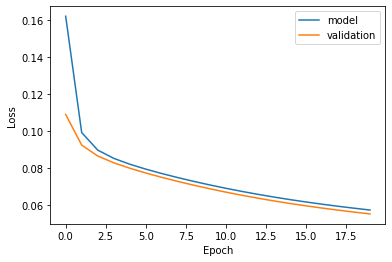

In [89]:
from matplotlib import pyplot as plt
plt.plot(history.history['loss'], label='model')
plt.plot(history.history['val_loss'], label='validation')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

### Observation
- The capacity of the network to approximate complex functions is poor.
- The model cannot model the training data well enough(poor training loss).

## A properfit model

In [92]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_28 (Conv2D)          (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d_28 (MaxPoolin  (None, 13, 13, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_29 (Conv2D)          (None, 11, 11, 32)        18464     
                                                                 
 max_pooling2d_29 (MaxPoolin  (None, 5, 5, 32)         0         
 g2D)                                                            
                                                                 
 flatten_22 (Flatten)        (None, 800)               0         
                                                                 
 dropout_13 (Dropout)        (None, 800)             

In [93]:
batch_size = 128
epochs = 100

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
mycallbacks = [keras.callbacks.EarlyStopping(monitor='loss', min_delta=1e-4, patience=3, verbose=1),
               keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', patience=3, verbose=1, restore_best_weights=True)
              ]
history = model.fit(x_train, y_train,
                    batch_size=batch_size, epochs=epochs,
                    validation_split=0.2,
                    callbacks=mycallbacks, verbose=0)

score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Restoring model weights from the end of the best epoch: 15.
Epoch 18: early stopping
Test loss: 0.027770062908530235
Test accuracy: 0.9902999997138977


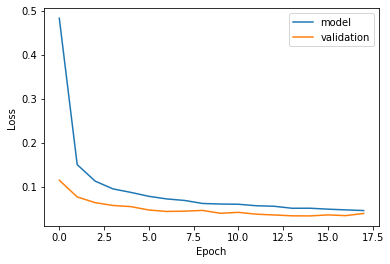

In [94]:
from matplotlib import pyplot as plt
plt.plot(history.history['loss'], label='model')
plt.plot(history.history['val_loss'], label='validation')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

### Observations
- Good generalizability.
- Can model both the training data and unknown data with very low error. 
- Using regularizations like dropouts and early stoping to achieve properfit.



## An overfit model

In [95]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        # layers.Dropout(0.5),
        layers.Dense(300, activation='sigmoid'),
        layers.Dense(200, activation='sigmoid'),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_30 (Conv2D)          (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d_30 (MaxPoolin  (None, 13, 13, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_31 (Conv2D)          (None, 11, 11, 32)        18464     
                                                                 
 max_pooling2d_31 (MaxPoolin  (None, 5, 5, 32)         0         
 g2D)                                                            
                                                                 
 flatten_23 (Flatten)        (None, 800)               0         
                                                                 
 dense_21 (Dense)            (None, 300)             

In [97]:
batch_size = 128
epochs = 100

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
mycallbacks = [keras.callbacks.EarlyStopping(monitor='loss', min_delta=1e-4, patience=3, verbose=1),
               keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', patience=3, verbose=1, restore_best_weights=True)
              ]
history = model.fit(x_train, y_train,
                    batch_size=batch_size, epochs=epochs,
                    validation_split=0.2, verbose=0)

score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.049793194979429245
Test accuracy: 0.9923999905586243


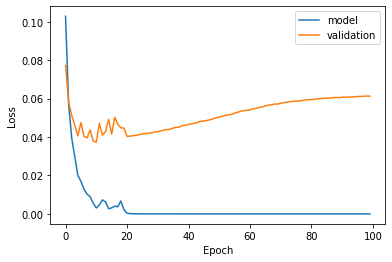

In [98]:
from matplotlib import pyplot as plt
plt.plot(history.history['loss'], label='model')
plt.plot(history.history['val_loss'], label='validation')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

### Observation
- The model is perfectly fit on the training data.
- Has poor generalizability, i.e., cannot model unseen data. This can be observed  by the validation loss where the loss increase over the number of epochs.